# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [359]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from   sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.stats.api as sms

import scipy.stats as stats
import math

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error 
import sklearn.metrics as sk
import pylab

## Loading the dataset

In [360]:
data = pd.read_csv('used_device_data.csv')
df= data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [361]:
df.shape

(3454, 15)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [363]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [364]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [365]:
def hist_box (data,x_var):
    plt.figure(figsize=(7,7))

    plt.subplot(211)
    sns.histplot(data, x= x_var , kde=True)

    plt.subplot(212)
    sns.boxplot(data, x= x_var)

    plt.show()

### Univariate Analysis

Mean for screen_size
13.71
Histogram and Boxplot for screen_size


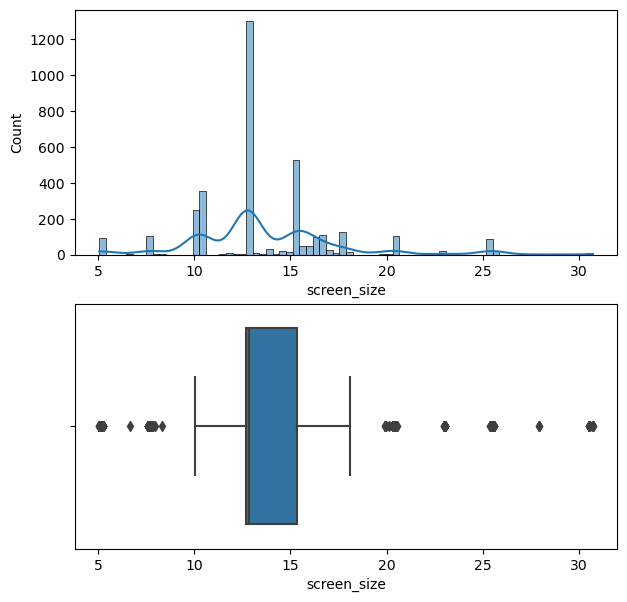

_________________________________________________________
Mean for main_camera_mp
9.46
Histogram and Boxplot for main_camera_mp


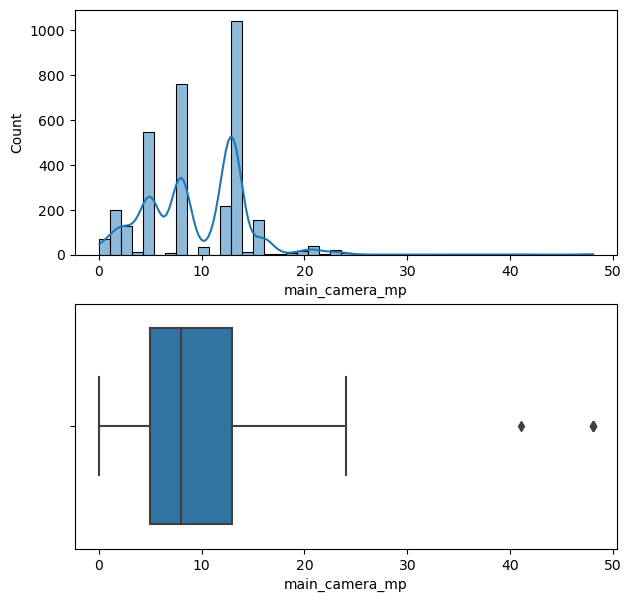

_________________________________________________________
Mean for selfie_camera_mp
6.55
Histogram and Boxplot for selfie_camera_mp


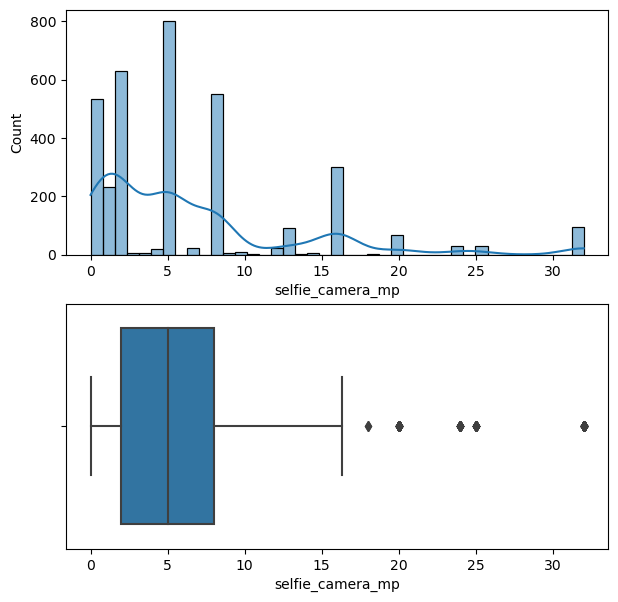

_________________________________________________________
Mean for int_memory
54.57
Histogram and Boxplot for int_memory


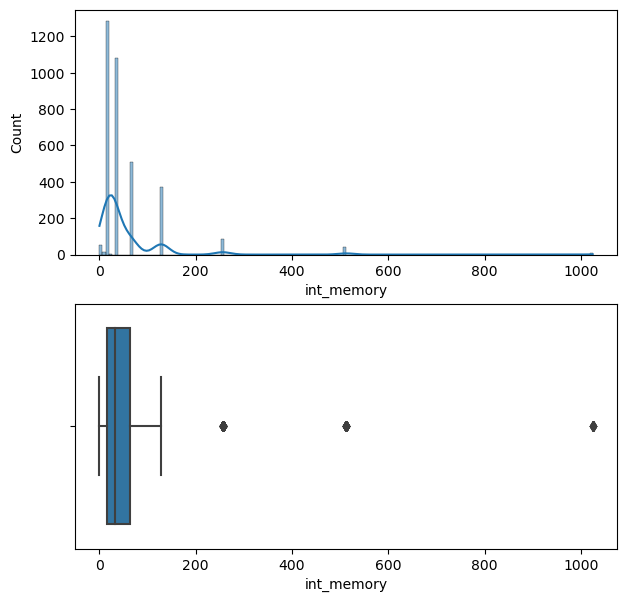

_________________________________________________________
Mean for ram
4.04
Histogram and Boxplot for ram


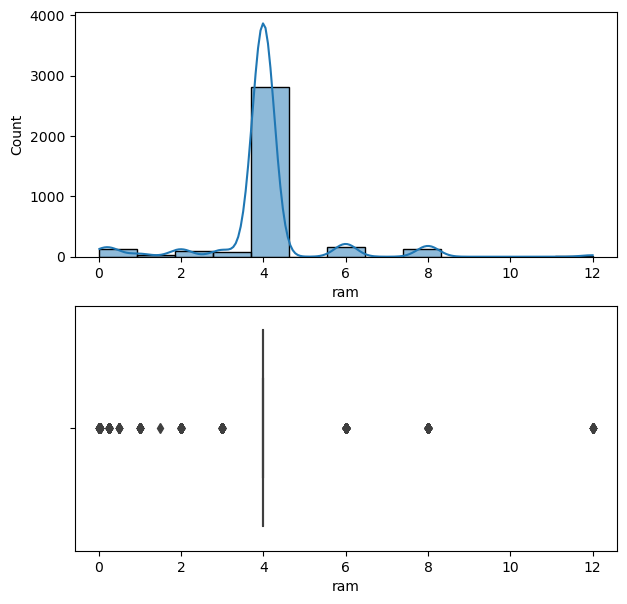

_________________________________________________________
Mean for battery
3133.4
Histogram and Boxplot for battery


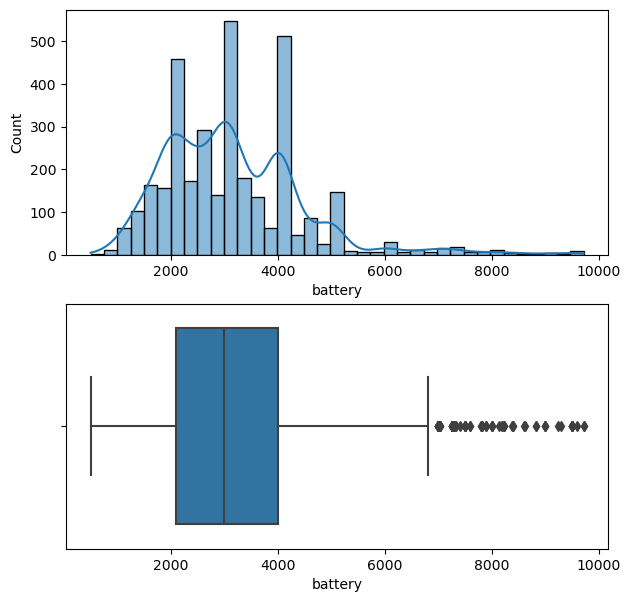

_________________________________________________________
Mean for weight
182.75
Histogram and Boxplot for weight


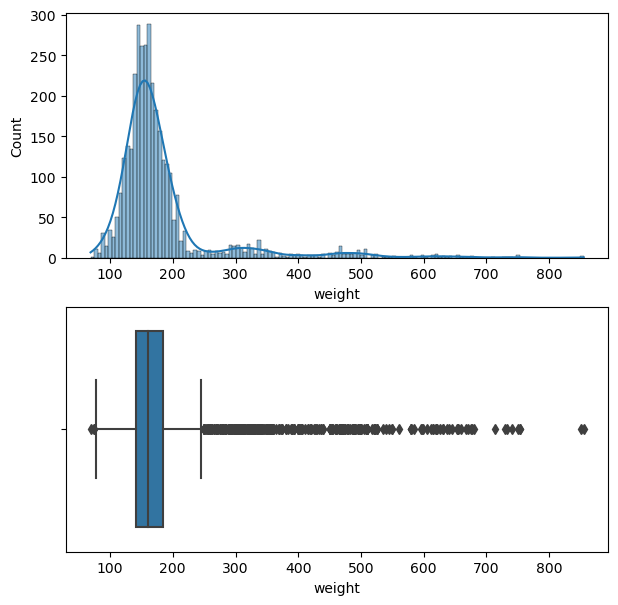

_________________________________________________________
Mean for release_year
2015.97
Histogram and Boxplot for release_year


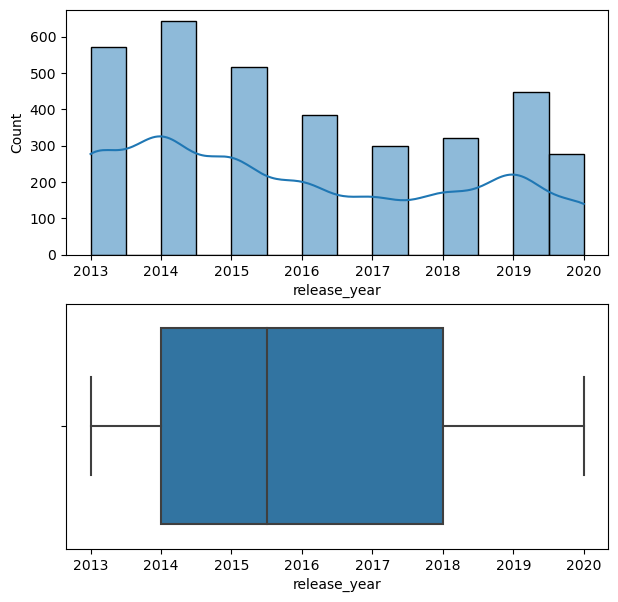

_________________________________________________________
Mean for days_used
674.87
Histogram and Boxplot for days_used


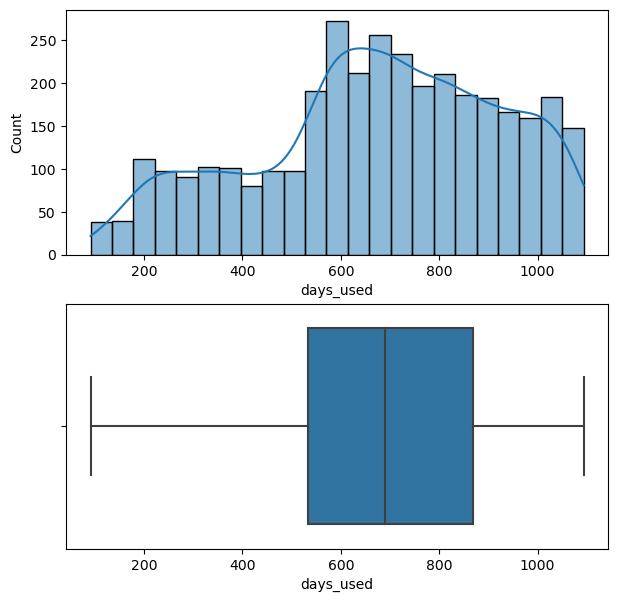

_________________________________________________________
Mean for normalized_used_price
4.36
Histogram and Boxplot for normalized_used_price


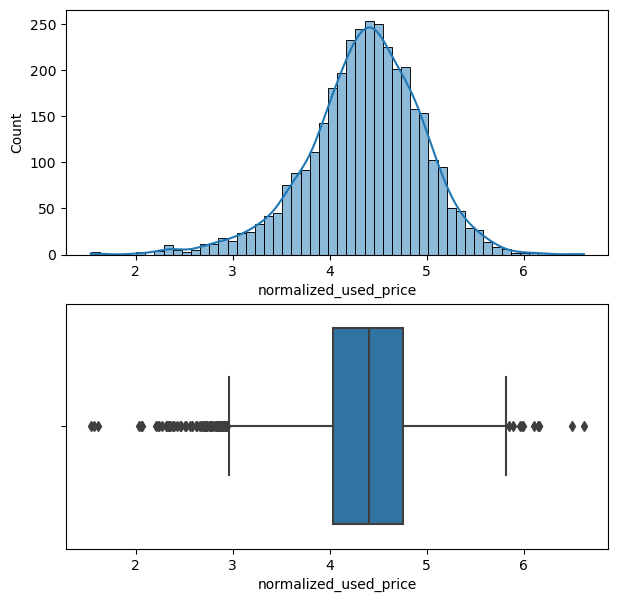

_________________________________________________________
Mean for normalized_new_price
5.23
Histogram and Boxplot for normalized_new_price


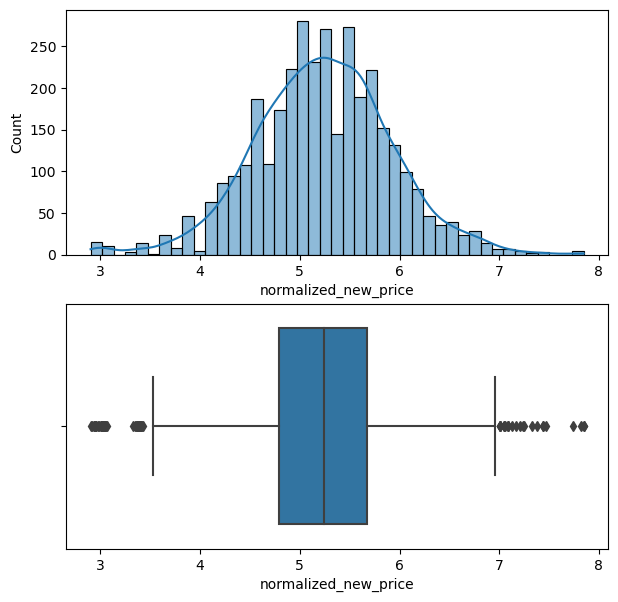

_________________________________________________________


In [366]:
for i in df.select_dtypes(exclude=['object']).columns.tolist():
    print('Mean for',i)
    print(round(df[i].mean(),2))
    print('Histogram and Boxplot for',i)
    hist_box(df,i)
    print('_________________________________________________________')

In [367]:
def countplot(data, x_var):
    plt.xticks(rotation=90)
    sns.countplot(data, x = x_var)
    plt.show()

Countplot for brand_name
brand_name
Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.033584
HTC           0.031847
Nokia         0.030689
Motorola      0.030689
Sony          0.024899
Meizu         0.017950
Gionee        0.016213
Acer          0.014765
XOLO          0.014186
Panasonic     0.013607
Realme        0.011870
Apple         0.011291
Lava          0.010423
Celkon        0.009554
Spice         0.008686
Karbonn       0.008396
Coolpad       0.006369
BlackBerry    0.006369
Microsoft     0.006369
OnePlus       0.006369
Google        0.004343
Infinix       0.002895
Name: proportion, dtype: float64


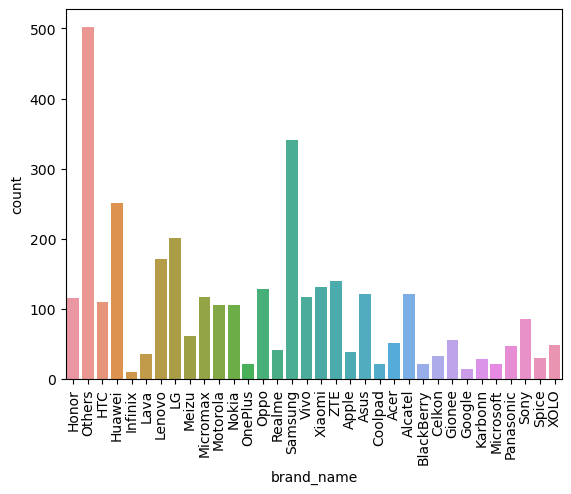

_________________________________________________
Countplot for os
os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64


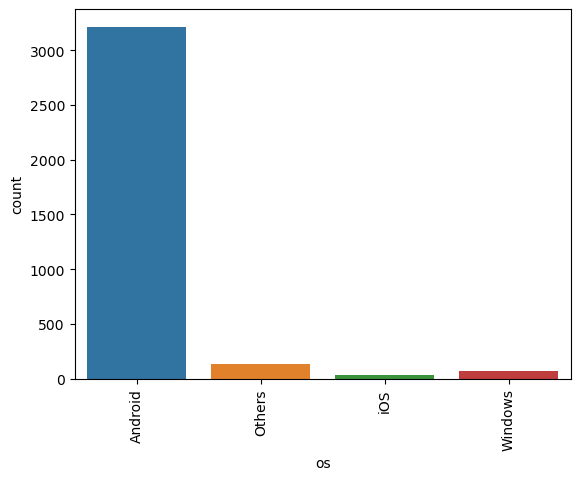

_________________________________________________
Countplot for 4g
4g
yes    0.676028
no     0.323972
Name: proportion, dtype: float64


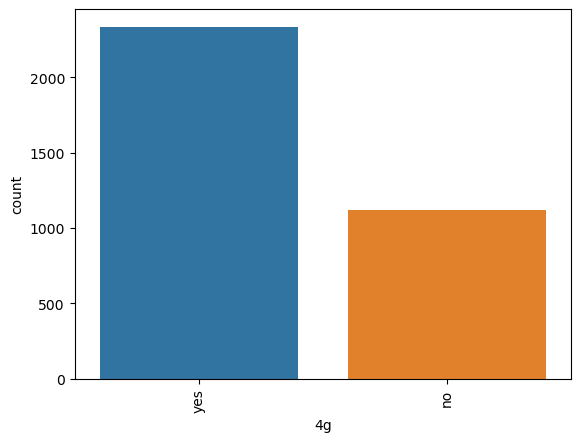

_________________________________________________
Countplot for 5g
5g
no     0.955993
yes    0.044007
Name: proportion, dtype: float64


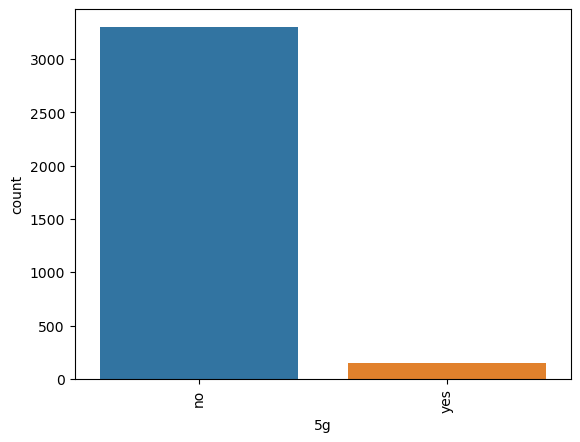

_________________________________________________
Countplot for release_year
release_year
2014    0.185871
2013    0.165026
2015    0.149102
2019    0.129126
2016    0.110886
2018    0.093225
2017    0.086566
2020    0.080197
Name: proportion, dtype: float64


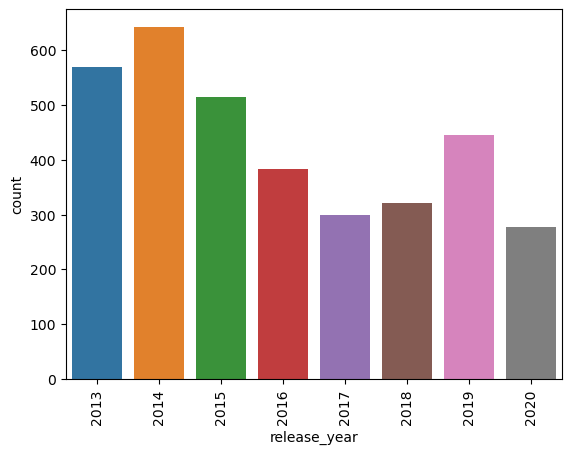

_________________________________________________


In [368]:
for i in ['brand_name','os','4g','5g','release_year']:
    print('Countplot for', i)
    print(df[i].value_counts(normalize=True))
    countplot(df,i)
    plt.show()
    print('_________________________________________________')

### Univariate Summary

#### What does the distribution of normalized used device prices look like?
The distribution of the normalized used prices is failry normally distributed with the mean being around 4.4. The boxplot shows there are outliers as well. The normalized price for new devices also seems to be close to normally distributed. 

#### What percentage of the used device market is dominated by Android devices?
According to the value counts for the "os" data, Android devices make up about 93% of the used devices in the dataset.
##### _____________________________________________

Screen size, camera megapixels, ram, and internal memory all show right-skewed datasets with a seemingly multi-modal pattern. This by be due to these variables being classified as float/continuous, but there seems to be a pattern showing certain values to be much higher in count than others. This may cause the strange looking histograms and boxplots. They have many outliers as well. Battery seems to be similarly distributed, but to a lesser degree. Weight is highly right-skewed with many outliers. The days used histogram shows a negative skew with the mean days used being around 670 days. 

For brand name, Samsung had the highest count in the dataset, not counting "Others," with 9.9% of the devices being from Samsung. 68% of the deivces have 4g capabilities, and 4.4% have 5g capabilities. For release year, it seems that 2014 has the highest release year count with 2020 having the lowest. 

### Bivariate Analysis

#### 1. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

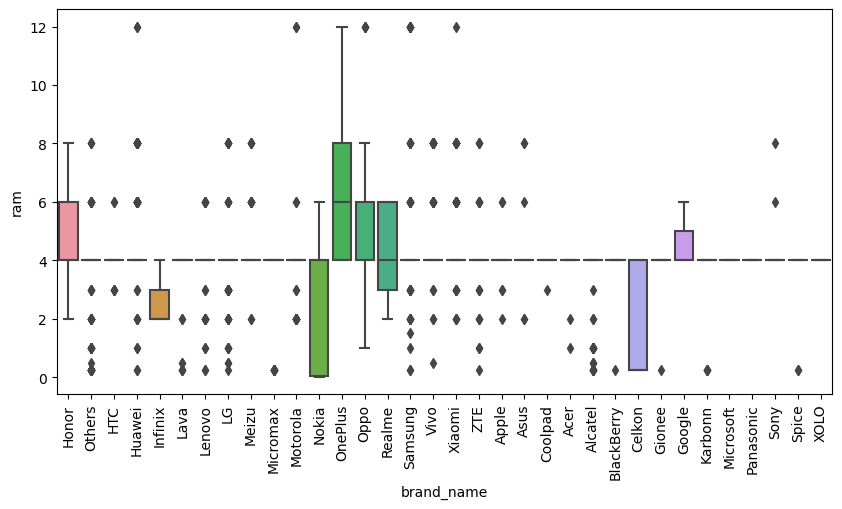

In [369]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

It seems that many brands have a median ram value of 4. However, brands like Nokia and Celkon have at least 50% of their ram values below 4 and OnePlus has a median value of 6. Almost every brand has outliers, but it makes sense with this type of data being almost discrete in nature.  

#### 2. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


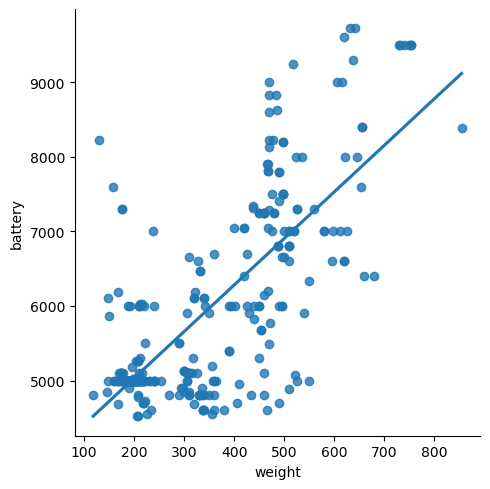

In [370]:
sns.lmplot(df.loc[df['battery']>4500], x= 'weight', y = 'battery', ci = False)

According to the linear model plot between weight and battery, it seems that for large batteries, as the battery power increases, so does the weight. This shows a positive correlation betweent the two. 

#### 3. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

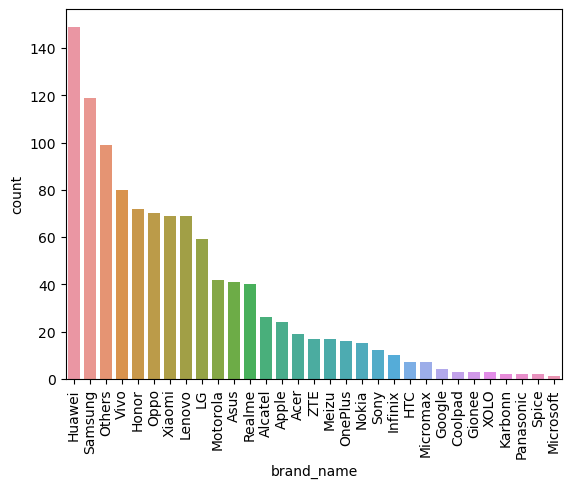

In [371]:
sns.countplot(df[df['screen_size']>(6*2.54)], x='brand_name', order = df[df['screen_size']>(6*2.54)]['brand_name'].value_counts().index )
plt.xticks(rotation=90);

Huawei and Samsung are the top 2 brands in the dataset that have the most amount of devices with screens larger than 6 inches. On the other side, Microsoft has the lowest amount of devices with this criteria. 

#### 4. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

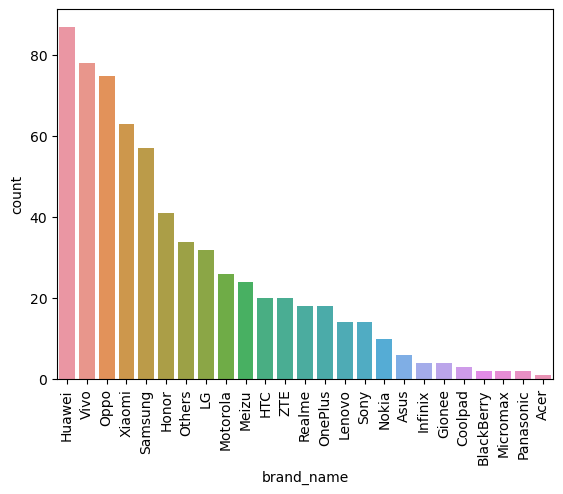

In [372]:
sns.countplot(df[df['selfie_camera_mp']>8], x='brand_name', order = df[df['selfie_camera_mp']>8]['brand_name'].value_counts().index)
plt.xticks(rotation=90);

Once again, Huawei has the highest number of devices providing front cameras with greater than 8MP of quality, followed by Vivio. On the other side, Acer has the lowest amount of devices with this criteria. 

#### 5. Which attributes are highly correlated with the normalized price of a used device?

<Axes: >

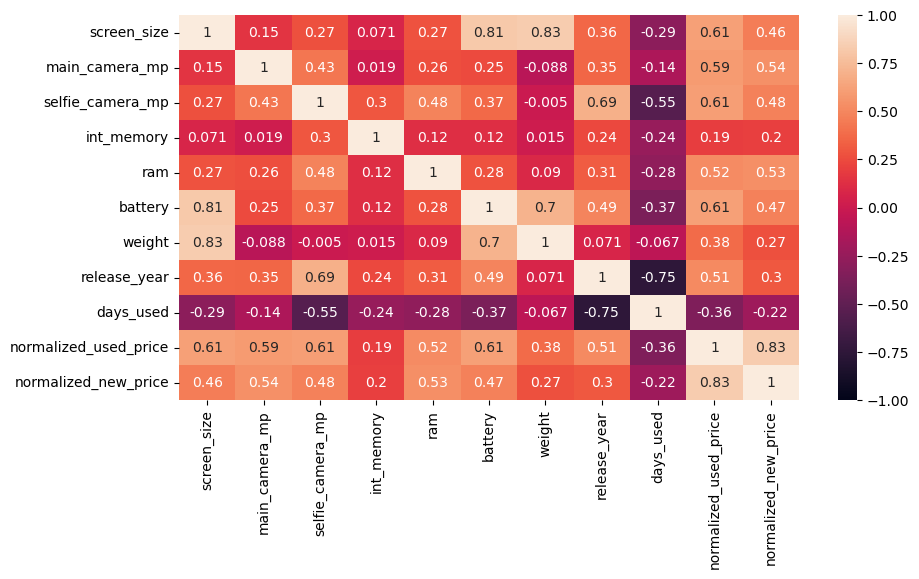

In [373]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.select_dtypes(include=['float64','int64']).corr(),annot=True,vmin=-1,vmax=1)

According to the heatmap, normalized used price is highly correlated with year of release, battery, ram, camera quality, and screen size. This makes sense as an increase in these variables will increase the cost of making the device. On the other hand, days used has a negative correlation. This also makes sense as the device loses value the older it is and the more it has been used. Other high correlated variables are weight and release year, weight and screen size, battery and screen size, internal memory and screen size.

C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\3346382165.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df, x='release_year', y='normalized_used_price',ci=False);


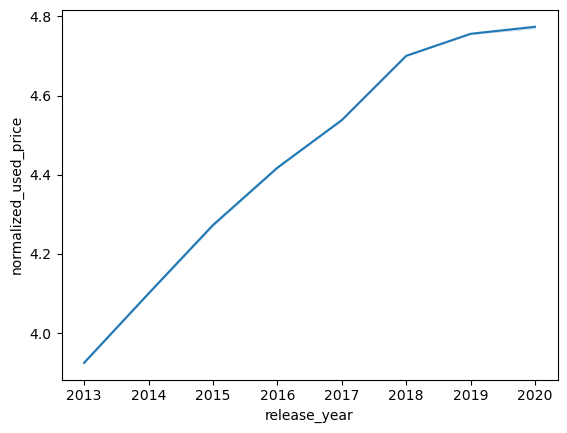

In [374]:
sns.lineplot(df, x='release_year', y='normalized_used_price',ci=False);

This lineplot shows that there is a steady incease in average used price as the release year of the phone increases. This makes sense as newer models would be more expensive. 

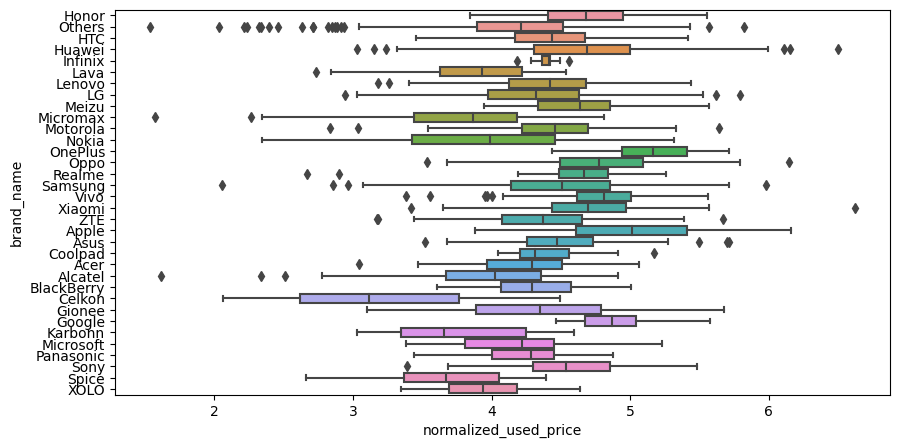

In [375]:
plt.figure(figsize=(10,5))
sns.boxplot(df, x='normalized_used_price',y='brand_name')
plt.show()

This boxplot shows that the used prices are varied among the brands with many outliers present. However it seems that Apple stands out as having the more expensive devvices. 

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


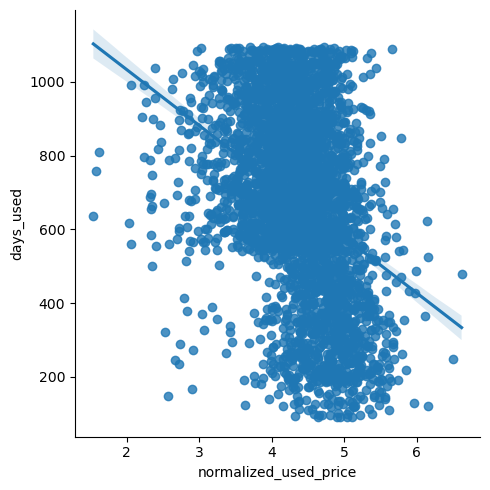

In [376]:
sns.lmplot(df, x='normalized_used_price', y = 'days_used')

This linear model plot shows that the longer the phone has been used for, the lower its used price. 

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


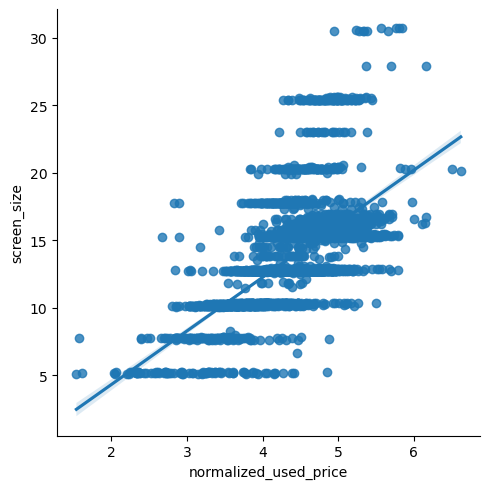

In [377]:
sns.lmplot(df,x='normalized_used_price',y='screen_size')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


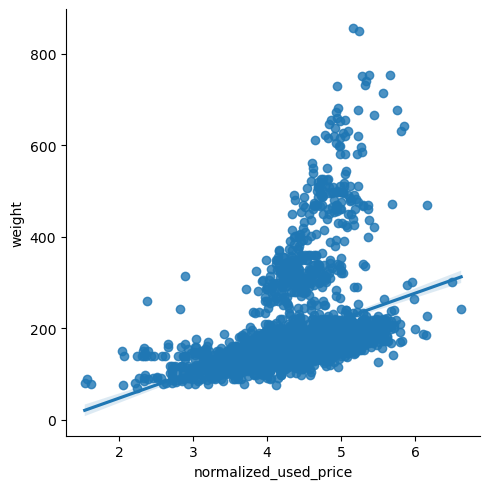

In [378]:
sns.lmplot(df,x='normalized_used_price',y='weight')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


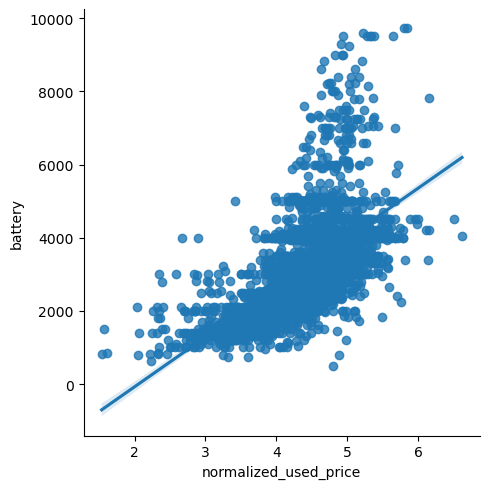

In [379]:
sns.lmplot(df,x='normalized_used_price',y='battery')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


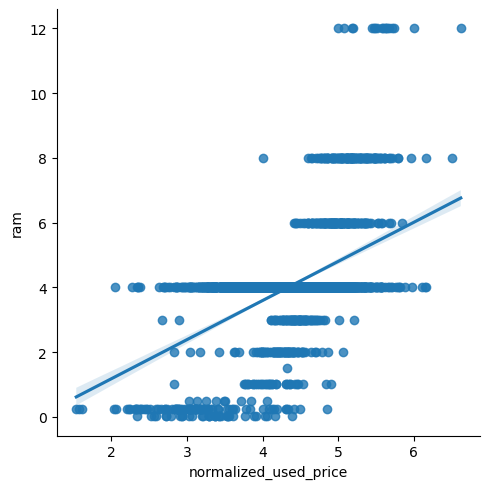

In [380]:
sns.lmplot(df,x='normalized_used_price',y='ram')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


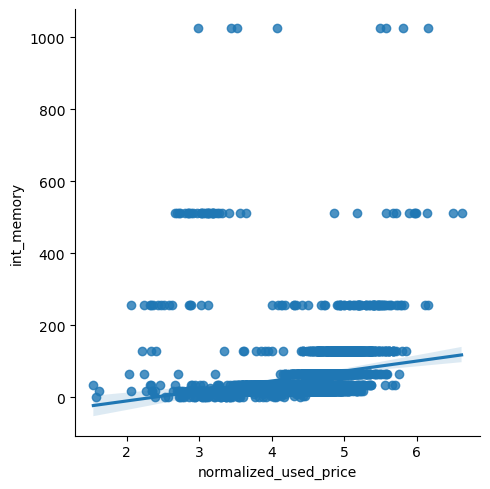

In [381]:
sns.lmplot(df,x='normalized_used_price',y='int_memory')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


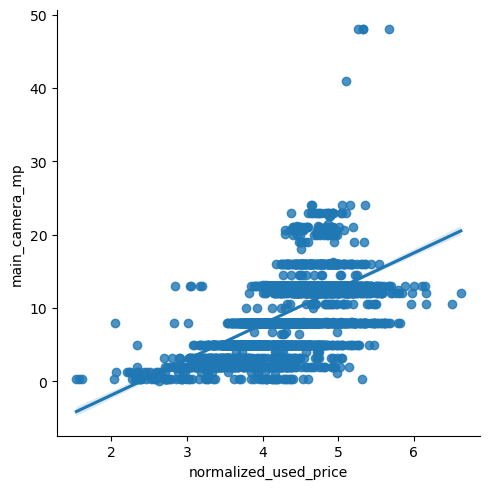

In [382]:
sns.lmplot(df,x='normalized_used_price',y='main_camera_mp')

C:\Users\shazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


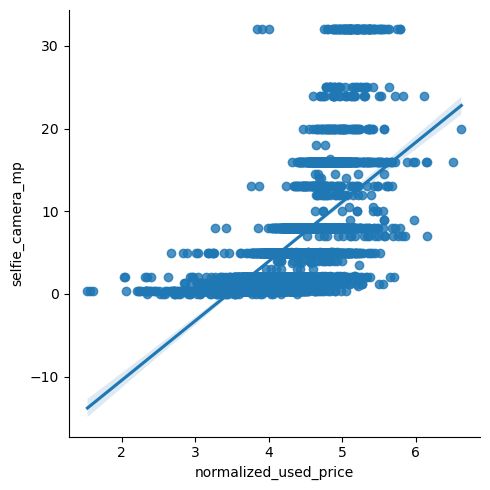

In [383]:
sns.lmplot(df,x='normalized_used_price',y='selfie_camera_mp')

The above 7 plots demonstrate there is a postive correlation between used price and screen size, internal memory, ram, battery, weight, and camera quality. This makes sense, as when these features become larger or more advanced, the cost of the device also increases. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [384]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [385]:
df1=df.copy()

In [386]:
sumnull = df1.isnull().sum()
null_col = sumnull[sumnull>0].index.tolist()
null_col

['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']

In [387]:
for i in null_col:
    df1[i] = df1[i].fillna(
    value = df1.groupby(['release_year','brand_name'])[i].transform('median')
    )

In [388]:
for i in null_col:
    df1[i] = df1[i].fillna(
    value = df1.groupby(['brand_name'])[i].transform('median')
    )

In [389]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(
    value = df1.groupby(['os'])['main_camera_mp'].transform('median')
)

In [390]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\shazi\AppData\Local\Temp\ipykernel_22044\1323849572.py:8: UserWarning: The figure layout has changed to tight
  plt.tight

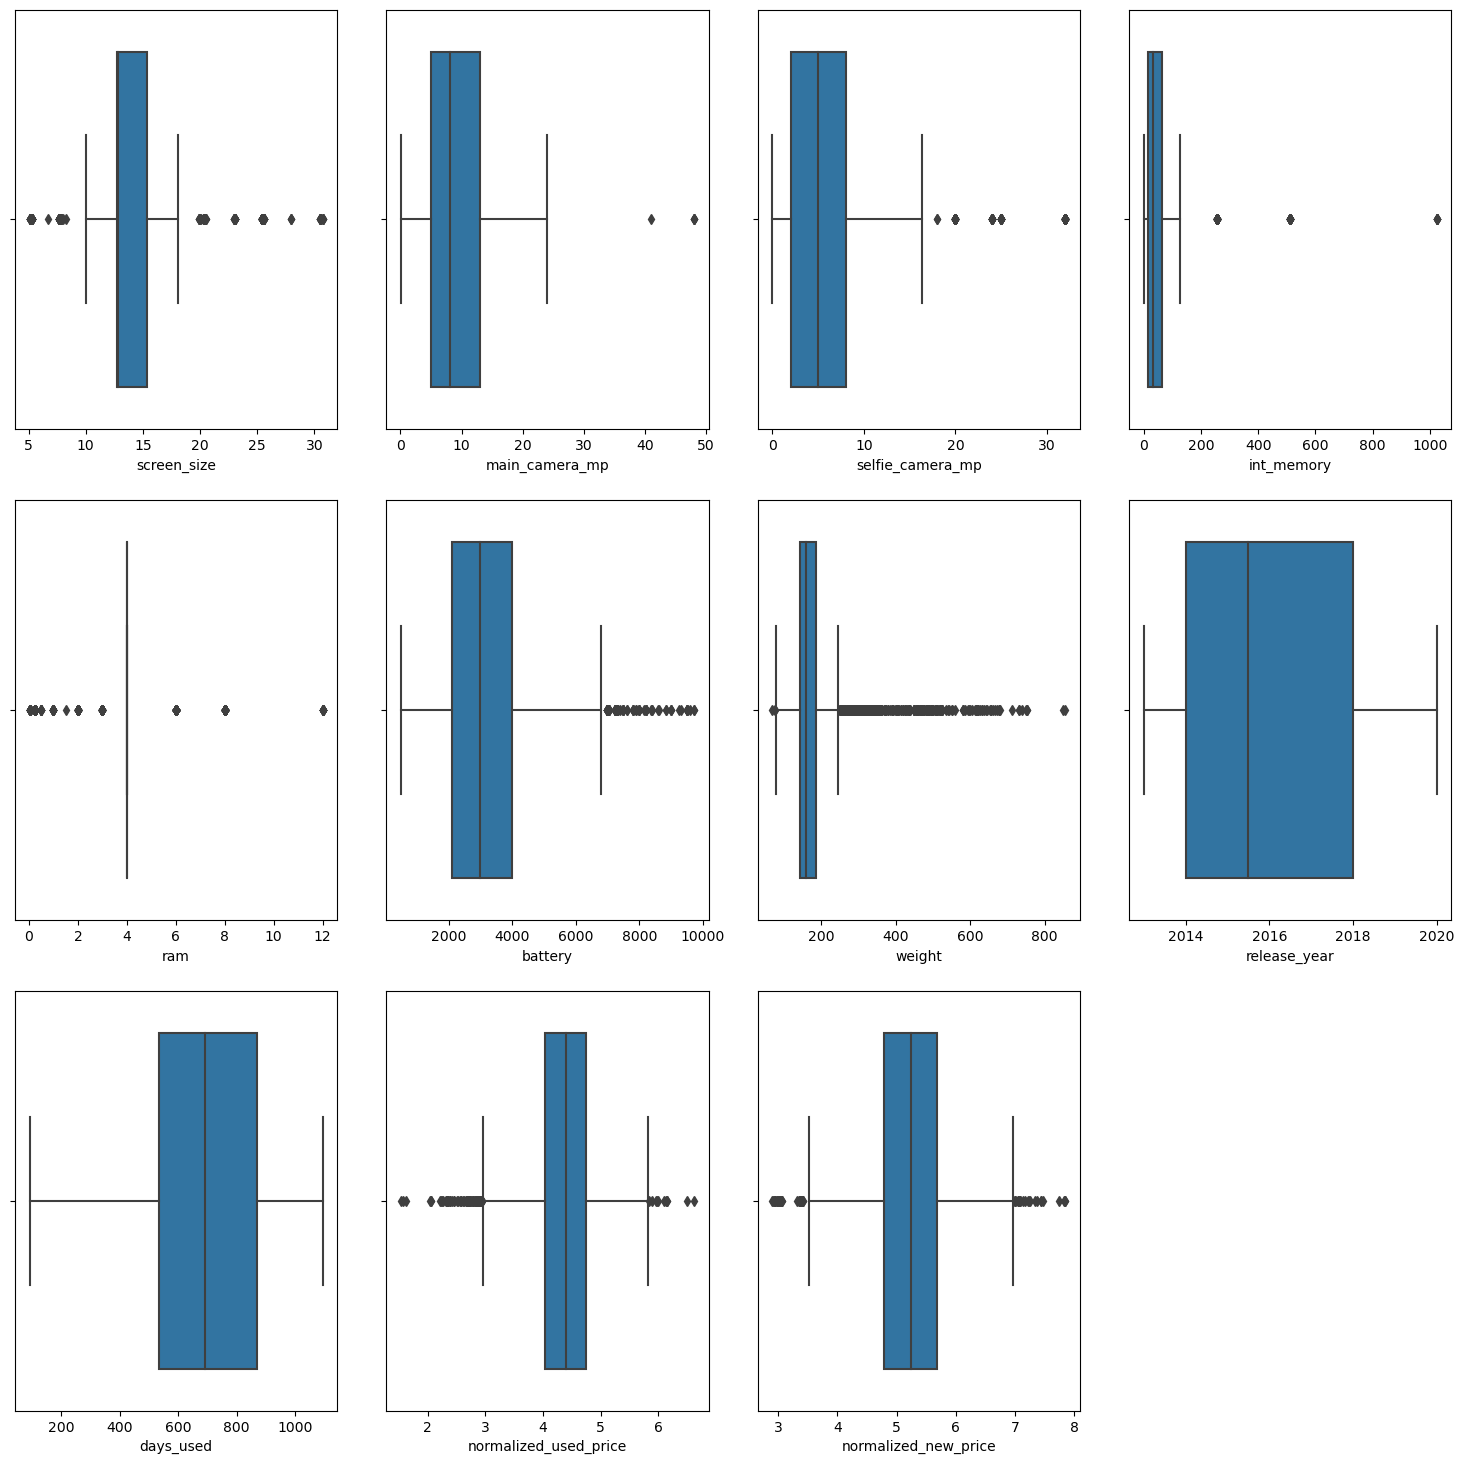

In [391]:
numeric_cols = df1.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(15,15))

for i, var in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=var)
    plt.tight_layout(pad=2)
        
plt.show()

These boxplots show the outliers in the numerical variables. While many of them do have outliers, it seems that the values are reasonable within the context of the dataset and problem, so no actions are necessary.  

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

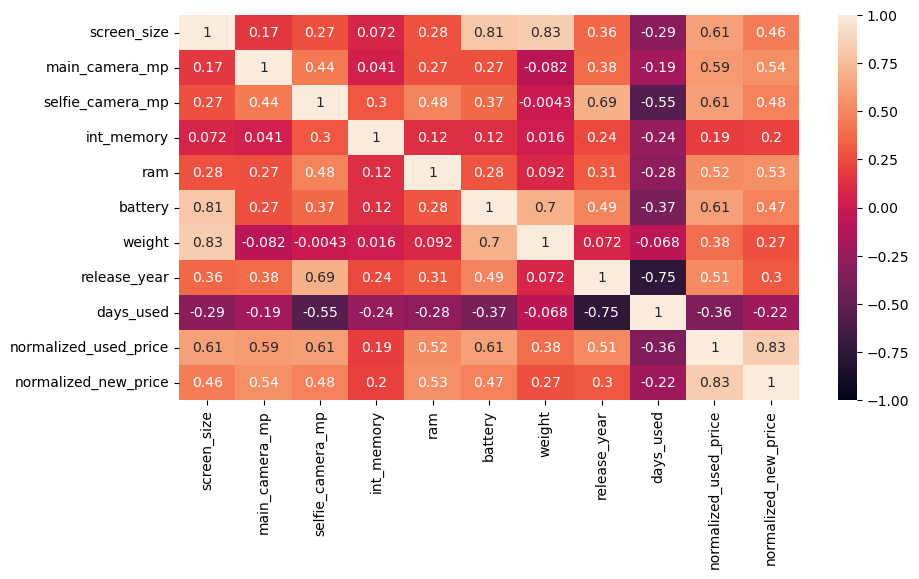

In [392]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df1.select_dtypes(include=['float64','int64']).corr(),annot=True,vmin=-1,vmax=1)


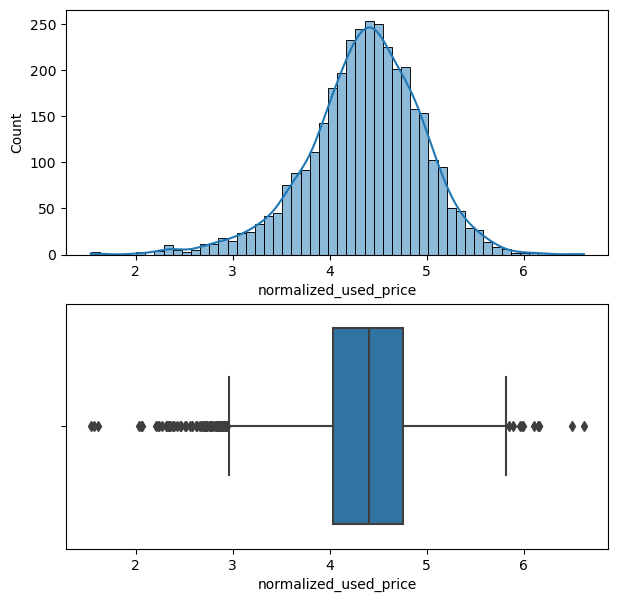

In [393]:
hist_box(df1,'normalized_used_price')

It seems that after manipulating the data, the correlation matrix and used price distribution remains largely unchanged. 

## Model Building - Linear Regression

In [394]:
X = df1.drop(['normalized_used_price'],axis=1)
y= df1['normalized_used_price']
display(X.head())
display(y.head())

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [395]:
X = sm.add_constant(X)

In [396]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,False,False,False,False,False,False,False,False,True,False


In [397]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train=x_train.astype(float)
display(x_train.head())
y_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,2014.0,819.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,2016.0,585.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,2015.0,727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,2015.0,800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,2017.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


3026    4.087488
1525    4.448399
1128    4.315353
3003    4.282068
2907    4.456438
Name: normalized_used_price, dtype: float64

In [398]:
olsmodel = sm.OLS(y_train,x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                           20:01:18   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [399]:
train_pred = olsmodel.predict(x_train)
test_pred = olsmodel.predict(x_test)

In [400]:
# Function to calculate adjusted R2
def adjr2(ind, dep, pred):
    r2 = r2_score(dep, pred)
    n = ind.shape[0]
    p = ind.shape[1]
    return 1 - ((1-r2) * (n-1) / (n-p-1))

In [401]:
# Function to calculate model performance factors
def model_perf (dep, ind, pred):
    model_perf_df = pd.DataFrame({
        'RMSE': np.sqrt(mean_squared_error(dep,pred)),
        'MAE': mean_absolute_error(dep, pred),
        'MAPE': mean_absolute_percentage_error(dep,pred)*100,
        'R-Squared': r2_score (dep, pred),
        'Adj R-Squared:': adjr2(ind, dep, pred)
    }, index=[0])
    return model_perf_df

In [402]:
print('Training Model Performance')
model_perf(y_train, x_train, train_pred)

Training Model Performance


,RMSE,MAE,MAPE,R-Squared,Adj R-Squared:
0,0.229884,0.180326,4.326841,0.844886,0.841675


In [403]:
print('Testing Model Performance')
model_perf(y_test,x_test,test_pred)

Testing Model Performance


,RMSE,MAE,MAPE,R-Squared,Adj R-Squared:
0,0.238358,0.184749,4.501651,0.842479,0.834659


#### Observations
- The training Adj R2 is at 84.2%, meaning the model is not underfitting
- The train and test RMSE and MAE are comparable meaning the model is not overfitting
- The training MAPE suggests the model is able to predict within 4.3% of the used prices.  

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Multicollinearity

In [404]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Initial VIF model
model_vif = pd.Series(
    [vif(x_train.values,i) for i in range(len(x_train.columns))],
    index = x_train.columns
)
model_vif = round(model_vif,2)
model_vif

const                    3791593.34
screen_size                    7.68
main_camera_mp                 2.29
selfie_camera_mp               2.81
int_memory                     1.36
ram                            2.28
battery                        4.08
weight                         6.40
release_year                   4.90
days_used                      2.66
normalized_new_price           3.12
brand_name_Alcatel             3.41
brand_name_Apple              13.06
brand_name_Asus                3.33
brand_name_BlackBerry          1.63
brand_name_Celkon              1.77
brand_name_Coolpad             1.47
brand_name_Gionee              1.95
brand_name_Google              1.32
brand_name_HTC                 3.41
brand_name_Honor               3.34
brand_name_Huawei              5.98
brand_name_Infinix             1.29
brand_name_Karbonn             1.57
brand_name_LG                  4.85
brand_name_Lava                1.71
brand_name_Lenovo              4.56
brand_name_Meizu            

In [405]:
high_vif = model_vif[model_vif>=5].drop('const').index.tolist()
print(high_vif)

['screen_size', 'weight', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_iOS']


In [406]:
# Function to remove high VIF variables one at a time and displays new Adj R2
def treat_multicoll (ind, dep, high_vif_col):
    adjr2_temp=[]
    for i in high_vif_col:
        train_temp = ind.drop([i],axis=1)
        ols_temp = sm.OLS(dep,train_temp).fit()
        adjr2_temp.append(ols_temp.rsquared_adj)
    
    dftemp = pd.DataFrame({
        'column':high_vif_col,
        'Adjusted R2 after dropping': adjr2_temp,
        'Diff from original adj R2' : np.abs(olsmodel.rsquared_adj - adjr2_temp)
    }).sort_values(by='Diff from original adj R2')
    return dftemp

In [407]:
treat_multicoll_table = treat_multicoll(x_train, y_train, high_vif)
display(treat_multicoll_table)
multicoll_table_list = treat_multicoll_table['column'].tolist()

,column,Adjusted R2 after dropping,Diff from original adj R2
5,brand_name_Samsung,0.841774,0.000032
6,os_iOS,0.841795,0.000053
4,brand_name_Others,0.841806,0.000064
3,brand_name_Huawei,0.841808,0.000067
2,brand_name_Apple,0.841809,0.000067
0,screen_size,0.838381,0.003361
1,weight,0.838071,0.003671


In [408]:
# Drops High VIF variables one at a time to see effect on remaining VIF variables
x_traincopy = x_train.copy()
for n in multicoll_table_list:
    print('High Vif Variables After Dropping',n)
    
    x_traincopy = x_traincopy.drop([n],axis=1)
    
    viftemp = pd.Series(
    [vif(x_traincopy.values,i) for i in range(x_traincopy.shape[1])],
    index = x_traincopy.columns)
    
    print(round(viftemp.drop('const')[viftemp>5]),2)
    print('')

High Vif Variables After Dropping brand_name_Samsung
screen_size          8.0
weight               6.0
brand_name_Apple    12.0
os_iOS              12.0
dtype: float64 2

High Vif Variables After Dropping os_iOS
screen_size    8.0
weight         6.0
dtype: float64 2

High Vif Variables After Dropping brand_name_Others
screen_size    8.0
weight         6.0
dtype: float64 2

High Vif Variables After Dropping brand_name_Huawei
screen_size    8.0
weight         6.0
dtype: float64 2

High Vif Variables After Dropping brand_name_Apple
screen_size    7.0
weight         6.0
dtype: float64 2

High Vif Variables After Dropping screen_size
Series([], dtype: float64) 2

High Vif Variables After Dropping weight
Series([], dtype: float64) 2



In [409]:
x_train_lowvif = x_train.drop(['brand_name_Samsung','os_iOS','brand_name_Others','brand_name_Huawei','brand_name_Apple','screen_size'],axis=1)
x_train_lowvif

,const,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,4g_yes,5g_yes
3026,1.0,8.0,0.3,16.0,4.0,1800.0,120.0,2014.0,819.0,4.796204,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,1.0,13.0,5.0,32.0,4.0,4050.0,225.0,2016.0,585.0,5.434595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1128,1.0,13.0,5.0,32.0,4.0,2550.0,162.0,2015.0,727.0,5.137914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,1.0,8.0,5.0,16.0,4.0,3200.0,126.0,2015.0,800.0,5.189228,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2907,1.0,13.0,16.0,16.0,4.0,2900.0,160.0,2017.0,560.0,5.016220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,8.0,2.0,16.0,4.0,2100.0,155.0,2013.0,802.0,5.006694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,1.0,5.0,0.3,16.0,4.0,1800.0,145.0,2013.0,850.0,5.195454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,1.0,13.0,24.0,64.0,4.0,3400.0,162.0,2018.0,720.0,5.345392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,13.0,32.0,128.0,6.0,3750.0,172.0,2019.0,311.0,5.515845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [410]:
# New model after dropping high VIF variables
ols_lowvif = sm.OLS(y_train,x_train_lowvif).fit()
print(ols_lowvif.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     299.3
Date:                   Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                           20:01:19   Log-Likelihood:                 94.984
No. Observations:                   2417   AIC:                            -104.0
Df Residuals:                       2374   BIC:                             145.0
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [411]:
x_train_highpval = x_train_lowvif.copy()
pcol = x_train_highpval.columns.tolist()

In [412]:
# Drops high p-val variables one at a time until the model has all low p-values
while len(pcol) > 0:
    ols_pval = sm.OLS(y_train, x_train_highpval[pcol]).fit()
    
    p_max = max(ols_pval.pvalues)
    
    pmax_col = ols_pval.pvalues.idxmax()
    
    if p_max > 0.05:
        pcol.remove(pmax_col)
    else: 
        break 
print(pcol)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [413]:
x_trainfinal = x_train_lowvif[pcol]
ols_final = sm.OLS(y_train, x_trainfinal).fit()
print(ols_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     965.0
Date:                   Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                           20:01:19   Log-Likelihood:                 80.685
No. Observations:                   2417   AIC:                            -133.4
Df Residuals:                       2403   BIC:                            -52.31
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [414]:
# creates independent variable test table based on finalized columns
common_cols = list(x_test.columns.intersection(x_trainfinal.columns))
x_testfinal = x_test.loc[:,common_cols]
print('Final Test Shape:', x_testfinal.shape)
print('Final Train Shape:', x_trainfinal.shape)

Final Test Shape: (1037, 14)
Final Train Shape: (2417, 14)


In [415]:
final_train_pred = ols_final.predict(x_trainfinal)
final_test_pred = ols_final.predict(x_testfinal)

In [416]:
print('Final Training Performance')
model_perf(y_train, x_trainfinal, final_train_pred)

Final Training Performance


,RMSE,MAE,MAPE,R-Squared,Adj R-Squared:
0,0.234027,0.183013,4.398706,0.839245,0.838308


In [417]:
print('Final Testing Performance')
model_perf(y_test, x_testfinal, final_test_pred)

Final Testing Performance


,RMSE,MAE,MAPE,R-Squared,Adj R-Squared:
0,0.241356,0.187534,4.570378,0.838492,0.83628


#### Observations
- The training Adj R2 is at 83.8%, meaning the model is not underfitting. This is comparable to the original Adj R2 value, meaning the model has kept its high explainability of variance. 
- The train and test RMSE and MAE are comparable meaning the model is not overfitting
- The training MAPE suggests the model is able to predict within 4.4% of the used prices.  

### Liniearity and Independence

In [418]:
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train
df_pred['Predicted Values'] = ols_final.fittedvalues
df_pred['Residuals'] = ols_final.resid
df_pred.head()

,Actual Values,Predicted Values,Residuals
3026,4.087488,3.860312,0.227176
1525,4.448399,4.641098,-0.192698
1128,4.315353,4.280502,0.034850
3003,4.282068,4.182370,0.099698
2907,4.456438,4.484842,-0.028404


<Axes: xlabel='Predicted Values', ylabel='Residuals'>

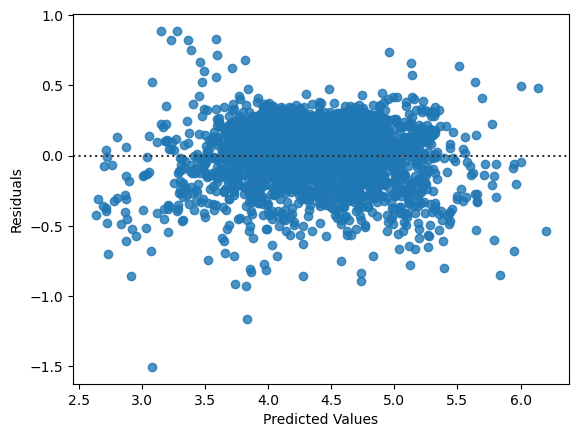

In [419]:
sns.residplot(data=df_pred,x='Predicted Values', y='Residuals')

The chart of Residuals vs Predicted Values shows little to no pattners, so the assumption of linearity is considered to be satisfied

### Normality

<Axes: xlabel='Residuals', ylabel='Count'>

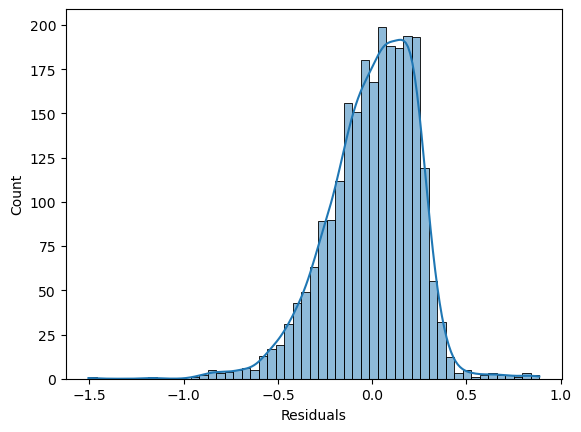

In [420]:
sns.histplot(data=df_pred, x='Residuals', kde=True)

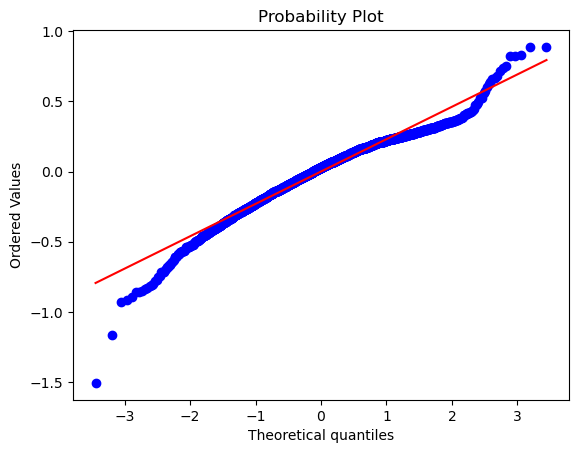

In [421]:
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab);

In [422]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9682695865631104, pvalue=1.098496509802694e-22)

The histogram, Q-Q plot, and Shaprio-Wilk's Test all show that the data is not normally distributed, and the assumption is not satisfied. However, for the purposes of this project, the assumption can be considered satisfied. 

### Homoscedasticity

In [423]:
homo_test = sms.het_goldfeldquandt(df_pred['Residuals'], x_trainfinal)
homo_test

(1.0190103386109723, 0.3724514012618002, 'increasing')

With a p-value of 0.37 for the GQ test, we can say that the model satisfies the assumption of homoscedasticity and the residuals are equally varied. 

### Final Model

In [424]:
print(ols_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     965.0
Date:                   Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                           20:01:19   Log-Likelihood:                 80.685
No. Observations:                   2417   AIC:                            -133.4
Df Residuals:                       2403   BIC:                            -52.31
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [425]:
ols_final.params

const                  -56.571865
main_camera_mp           0.021342
selfie_camera_mp         0.014306
ram                      0.022659
weight                   0.001647
release_year             0.028742
normalized_new_price     0.434048
brand_name_Karbonn       0.122250
brand_name_Lenovo        0.053703
brand_name_Nokia         0.062132
brand_name_Xiaomi        0.089585
os_Others               -0.143122
4g_yes                   0.045603
5g_yes                  -0.064501
dtype: float64

## Actionable Insights and Recommendations 

#### Conclusions & Observations
- The model is able to explain about 84% of the variation in the data. It is able to predict within 4.6% of the used prices on the test data. This shows the model is good for prediction and inference. 
- The used price is highly positively correlated with the features of the device such as ram, weight, and camera quality. 
- The release year has a positive correlation to used price, with each additional year adding a value of 0.029 to the device's used price. 
- Days used has a negative correlation to used price. As the days used increaes, the price decreases. 
- The brands categorized in "Others" descrease the used price, as if a device is under that category, its used price decreaes by a value of 0.14. 
- Devices offering 4g increase the used price by a value of 0.046

#### Recommendations
- As the used price increases with release year, the company can promote newer devices to be sold. 
- Devices with higher camera quality, ram, weight, internal memory, and screen size can be promoted more as they are associated with higher prices. 
- The longer a device has been used the lower its price, so the company can promote less used devices as they may be associted with higher profits.
- It seems Apple devices generally have higher prices, so promoting this brand may lead to better profits. 
- With the Android OS dominating the dataset, the company should strive to bring other OS's into the market so that there may be variety in their devices and it could lead to more buyers. 
- As most of the devices do not offer 5g, the company could also promote devices with that feature to increase variety and possibly consumer base. 
- The company can gather data concerning overall speed and power of the devices, as this is what buyers may be looking for. Maybe factors such as internal computer chips and processors. 

___